## Foundations of Data Science: Inferential Thinking by Resampling

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lab 3: Inference - Part 1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 9)

In [11]:
murder_rates = pd.read_csv('data/crime_rates.csv',
                           usecols=['State', 'Year', 'Population', 'Murder Rate'])


In [12]:
murder_rates

,State,Year,Population,Murder Rate
0,Alaska,1960,226167,10.20
1,Alaska,1961,234000,11.50
2,Alaska,1962,246000,4.50
3,Alaska,1963,248000,6.50
...,...,...,...,...
2196,Wyoming,2000,493782,2.40
2197,Wyoming,2001,494423,1.80
2198,Wyoming,2002,498830,3.00
2199,Wyoming,2003,501242,2.80


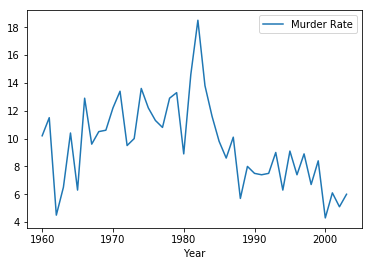

In [69]:
(murder_rates.loc[murder_rates['State'] == 'Alaska']
 .plot.line('Year', 'Murder Rate')
)                  
plt.show()

In [130]:
state_by_year = pd.pivot_table(murder_rates, values='Murder Rate', index='Year', columns='State')
state_by_year

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachuse,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Isla,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,12.40,10.20,6.00,8.50,3.90,4.20,1.60,7.40,10.60,11.90,2.40,2.40,4.90,4.40,0.60,2.90,6.70,8.30,1.70,5.40,1.40,4.50,1.20,10.00,4.40,3.90,2.30,8.80,1.30,2.70,7.40,2.90,10.60,0.50,3.20,7.50,2.40,2.60,1.00,13.20,2.10,8.50,8.60,1.00,0.30,12.30,2.10,4.40,1.30,4.80
1961,12.90,11.50,6.00,9.10,3.70,4.70,1.00,4.40,9.10,10.00,2.30,2.00,4.80,4.10,1.30,1.90,6.50,6.40,1.60,4.50,1.50,4.10,1.00,10.30,5.10,2.50,2.40,7.00,0.60,2.50,6.80,3.50,9.20,0.90,3.10,5.00,2.70,2.60,1.00,11.60,1.70,8.00,8.10,1.70,1.50,8.60,2.20,4.40,1.60,3.30
1962,9.40,4.50,5.70,7.90,3.90,5.00,1.30,4.30,7.70,10.30,2.90,3.00,5.30,3.50,1.10,2.80,6.50,6.80,1.40,5.70,1.80,3.40,0.90,7.30,5.50,2.10,1.50,8.10,2.40,3.00,6.30,3.60,7.90,1.20,3.20,5.10,2.90,2.70,0.80,10.10,3.30,6.10,7.20,2.30,0.30,8.70,2.50,3.70,0.90,3.30
1963,10.20,6.50,6.00,7.40,3.80,4.80,1.80,5.00,8.20,9.40,1.70,2.50,5.10,2.80,1.30,2.60,5.60,6.90,1.90,6.30,1.90,3.50,1.20,7.20,5.20,2.00,2.00,7.90,3.20,2.80,5.60,3.80,8.20,2.10,3.00,5.20,3.00,2.30,1.40,10.00,1.20,6.50,7.40,2.40,0.50,7.10,2.50,5.30,1.70,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,7.40,4.30,7.00,6.30,6.10,3.10,2.90,3.20,5.60,8.00,2.90,1.20,7.20,5.80,1.60,6.30,4.80,12.50,1.20,8.10,2.00,6.70,3.10,9.00,6.20,2.20,3.70,6.50,1.80,3.40,7.40,5.00,7.00,0.60,3.70,5.30,2.00,4.90,4.30,7.30,0.90,7.20,5.90,1.90,1.50,5.70,3.30,2.50,3.20,2.40
2001,8.50,6.10,7.50,5.50,6.40,3.60,3.10,2.90,5.30,7.10,2.60,2.30,7.90,6.80,1.70,3.40,4.70,11.20,1.40,8.30,2.30,6.70,2.40,9.90,6.60,3.80,2.50,8.50,1.40,4.00,5.40,5.00,6.20,1.10,4.00,5.30,2.40,5.30,3.70,6.30,0.90,7.40,6.20,3.00,1.10,5.10,3.00,2.20,3.60,1.80
2002,6.80,5.10,7.10,5.20,6.80,4.00,2.40,3.20,5.50,7.10,1.90,2.70,7.60,5.90,1.50,2.90,4.70,13.20,1.10,9.40,2.70,6.80,2.20,9.20,5.80,1.80,2.80,8.40,0.90,4.00,8.20,4.80,6.60,0.80,4.60,4.70,2.00,5.10,3.80,7.30,1.40,7.30,6.00,2.00,2.10,5.30,3.00,3.20,2.80,3.00
2003,6.60,6.00,7.90,6.40,6.80,3.90,3.00,2.90,5.40,7.60,1.70,1.80,7.10,5.50,1.60,4.50,4.60,13.00,1.20,9.50,2.20,6.10,2.50,9.30,5.00,3.30,3.20,8.80,1.40,4.70,6.00,4.90,6.10,1.90,4.60,5.90,1.90,5.30,2.30,7.20,1.30,6.80,6.40,2.50,2.30,5.60,3.00,3.50,3.30,2.80


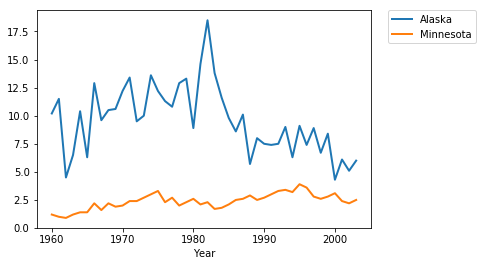

In [131]:
state_by_year.loc[:, ['Alaska', 'Minnesota']].plot.line(lw=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

Implement the function most_murderous, which takes a year (an integer) as its argument. It does two things:

It draws a horizontal bar chart of the 5 states that had the highest murder rates in that year.
It returns an array of the names of these states in order of increasing murder rate.

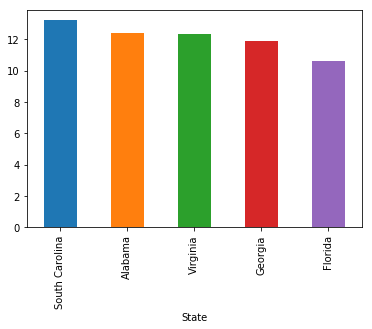

['Florida' 'Georgia' 'Virginia' 'Alabama' 'South Carolina']


In [164]:
def most_murderous(year, top=5):
    most_table = state_by_year.loc[year].sort_values(ascending=False)[:top]
    most_table.plot.bar()
    plt.show()
    return most_table.index.values[::-1]

print(most_murderous(1960))

In [169]:
murder_rates['People'] = ((murder_rates['Murder Rate'] * 
                           murder_rates['Population']) / 100000)
murder_rates

,State,Year,Population,Murder Rate,People
0,Alaska,1960,226167,10.20,23.07
1,Alaska,1961,234000,11.50,26.91
2,Alaska,1962,246000,4.50,11.07
3,Alaska,1963,248000,6.50,16.12
...,...,...,...,...,...
2196,Wyoming,2000,493782,2.40,11.85
2197,Wyoming,2001,494423,1.80,8.90
2198,Wyoming,2002,498830,3.00,14.96
2199,Wyoming,2003,501242,2.80,14.03


In [189]:
#California in 1988 vs 1975
((murder_rates.loc[(murder_rates['State'] == 'California') & 
                 (murder_rates['Year'] == 1988)].People.values) -
(murder_rates.loc[(murder_rates['State'] == 'California') & 
                 (murder_rates['Year'] == 1975)].People.values))

array([726.23197346])